## Feature Selection & Encoding

In [1]:
# Import the libraries needed

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [2]:
# ******************************************************
# TWO CHANGES NEED TO BE MADE TO THIS NOTEBOOK IF 'RACE'
# ATTRIBUTE IS REMOVED
# ******************************************************

In [3]:
# Read in the dataset passed from the last module

data = pd.read_csv('Mod_2_data_to_pass.csv')

In [4]:
# Checking data types before proceeding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    99343 non-null  object
 1   age                       99343 non-null  object
 2   admission_type_id         99343 non-null  object
 3   discharge_disposition_id  99343 non-null  int64 
 4   time_in_hospital          99343 non-null  int64 
 5   num_lab_procedures        99343 non-null  int64 
 6   num_procedures            99343 non-null  int64 
 7   num_medications           99343 non-null  int64 
 8   number_outpatient         99343 non-null  int64 
 9   number_emergency          99343 non-null  int64 
 10  number_inpatient          99343 non-null  int64 
 11  diag_1                    99323 non-null  object
 12  diag_2                    98987 non-null  object
 13  diag_3                    97924 non-null  object
 14  number_diagnoses      

In [5]:
# Change data types to categories

cat_list = ['gender', 'age', 'admission_type_id', 'discharge_disposition_id',
            'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'change',
           'diabetesMed', 'readmitted', 'Meglitinides', 'Thiazolidinediones',
           'Sulfonylureas', 'AG_Inhibitors', 'Metformin', 'Insulin', 'Admission_Source']

#cat_list.append('race')

for item in cat_list:
    data[item] = data[item].astype('category')



In [6]:
# Confirming data types have been changed to categorical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    99343 non-null  category
 1   age                       99343 non-null  category
 2   admission_type_id         99343 non-null  category
 3   discharge_disposition_id  99343 non-null  category
 4   time_in_hospital          99343 non-null  int64   
 5   num_lab_procedures        99343 non-null  int64   
 6   num_procedures            99343 non-null  int64   
 7   num_medications           99343 non-null  int64   
 8   number_outpatient         99343 non-null  int64   
 9   number_emergency          99343 non-null  int64   
 10  number_inpatient          99343 non-null  int64   
 11  diag_1                    99323 non-null  category
 12  diag_2                    98987 non-null  category
 13  diag_3                    97924 non-null  cate

## One Hot Encoding

In [7]:
# ONE HOT ENCODING IN A LOOP
# DRUGS NOT INCLUDED
# USE ONE-HOT ENCODING TO BINARIZE CATEGORICAL ATTRIBUTES


# Create one hot encoder (start the tool)
# ?? Don't understand what 'sparse_output = False' does
encoder = OneHotEncoder(sparse_output = False, dtype = np.int)

# Create a new dataframe to store the one-hot encoded data
encoded_dataframes = []

# Create a list of all the categorical columns to be one-hot encoded
cat_columns = ['gender', 'age', 'admission_type_id',
               'discharge_disposition_id', 'max_glu_serum', 'A1Cresult',
               'Meglitinides', 'Thiazolidinediones', 'Sulfonylureas',
               'AG_Inhibitors', 'Metformin', 'Insulin', 'change',
               'diabetesMed', 'Admission_Source']

#cat_columns.append('race')

for column in cat_columns:
    # Get data to be encoded from original dataset
    column_data = data[[column]]

    # Use the encoder
    encoded_data = encoder.fit_transform(column_data)

    # Create a temporary dataframe to hold encoded data
    temp_encoded_data = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out([column]))

    # Add the encoded dataframe to the list created above
    encoded_dataframes.append(temp_encoded_data)

# Concat all the encoded dataframes in the temp_encoded_data list
completed_dataframe = pd.concat(encoded_dataframes, axis = 1)

# Remove the original columns from test3
data_copy = data.copy()
data_copy = data_copy.drop(cat_columns, axis = 1)


# Put the remaining original data columns together with the encoded dataframe
data = pd.concat([data_copy, completed_dataframe], axis=1)

C:\Users\Ingli\AppData\Local\Temp\ipykernel_23644\283034030.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  encoder = OneHotEncoder(sparse_output = False, dtype = np.int)


In [8]:
# Confirming One Hot Encoding was done correctly and verifying new number of attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   time_in_hospital                 99343 non-null  int64   
 1   num_lab_procedures               99343 non-null  int64   
 2   num_procedures                   99343 non-null  int64   
 3   num_medications                  99343 non-null  int64   
 4   number_outpatient                99343 non-null  int64   
 5   number_emergency                 99343 non-null  int64   
 6   number_inpatient                 99343 non-null  int64   
 7   diag_1                           99323 non-null  category
 8   diag_2                           98987 non-null  category
 9   diag_3                           97924 non-null  category
 10  number_diagnoses                 99343 non-null  int64   
 11  readmitted                       99343 non-null  category
 12  gend

## Split Data into Train and Test Sets

In [9]:
# Select all the features except the target variable
X = data.drop('readmitted', axis = 1)
#print(X.info())

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, data['readmitted'], test_size = 0.2, random_state=403)

In [10]:
print('X_train size\n', X_train.shape)

print('\nX_test size\n', X_test.shape)

X_train size
 (79474, 80)

X_test size
 (19869, 80)


## Feature Scaling of Quantitative Attributes

In [11]:
# Create a list of the quantitative attributes

quantList = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
             'num_medications', 'number_outpatient', 'number_emergency',
             'number_inpatient', 'number_diagnoses']

# Instantiate the StandardScaler tool
scaler = StandardScaler()

X_train[quantList] = scaler.fit_transform(X_train[quantList])

In [12]:
X_train

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,...,Insulin_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,Admission_Source_Emerg_Dept,Admission_Source_Missing,Admission_Source_Other,Admission_Source_Referral,Admission_Source_Transfer
38179,-1.137970,-0.609203,2.743051,-0.892059,-0.362295,-0.312787,-0.538492,414,250.01,414,...,0,1,0,0,1,0,0,0,1,0
96739,-1.137970,-1.680635,1.567417,-0.503726,0.734082,1.589016,-0.538492,379,362,366,...,0,1,0,0,1,1,0,0,0,0
70345,-0.801986,-2.088799,-0.196033,0.014051,-0.362295,-0.312787,0.341344,414,413,403,...,0,0,1,1,0,1,0,0,0,0
217,-1.137970,0.564269,2.155234,-1.539281,-0.362295,-0.312787,-0.538492,414,250.6,250.51,...,1,0,1,0,1,0,0,0,1,0
11101,-0.801986,0.003043,0.391784,-0.374282,-0.362295,-0.312787,-0.538492,574,250,401,...,1,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,2.221878,0.819372,-0.783849,-0.374282,-0.362295,-0.312787,0.341344,486,250,530,...,0,0,1,1,0,1,0,0,0,0
38736,0.877939,0.054064,2.155234,2.602938,-0.362295,-0.312787,0.341344,721,496,414,...,0,1,0,0,1,1,0,0,0,0
41916,-0.801986,-2.139820,-0.783849,-0.762615,-0.362295,-0.312787,1.221179,486,496,428,...,0,1,0,0,1,1,0,0,0,0
31351,-0.466001,0.513248,-0.783849,0.531829,-0.362295,-0.312787,1.221179,536,428,250.6,...,1,1,0,0,1,1,0,0,0,0


## SMOTE

In [13]:
# Three attributes contain NaN data so they need to be removed from the dataset
# Remove diag_1, diag_2 and diag_3 due to NaN
X_train = X_train.drop('diag_1', axis = 1)
X_train = X_train.drop('diag_2', axis = 1)
X_train = X_train.drop('diag_3', axis = 1)

In [14]:
smote = SMOTE()
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [15]:
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 79474 entries, 38179 to 2226
Series name: readmitted
Non-Null Count  Dtype   
--------------  -----   
79474 non-null  category
dtypes: category(1)
memory usage: 698.6 KB


In [16]:
Y_train_resampled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 126204 entries, 0 to 126203
Series name: readmitted
Non-Null Count   Dtype   
--------------   -----   
126204 non-null  category
dtypes: category(1)
memory usage: 123.5 KB


## Feature Importance from Tree-Based Models

In [17]:
# Time how long this code takes to run
start_time = time.time()

# Train a random forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train_resampled, Y_train_resampled)

# Get feature importance scores
important_features = classifier.feature_importances_

# Get feature names from your dataset
feature_names = X_train_resampled.columns

# Create a dataframe to associate feature names with their importance scores
feature_importance_df = pd.DataFrame({'Feature' : feature_names, 'Importance' : important_features})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = False)

end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

Time taken: 25.931939125061035 seconds


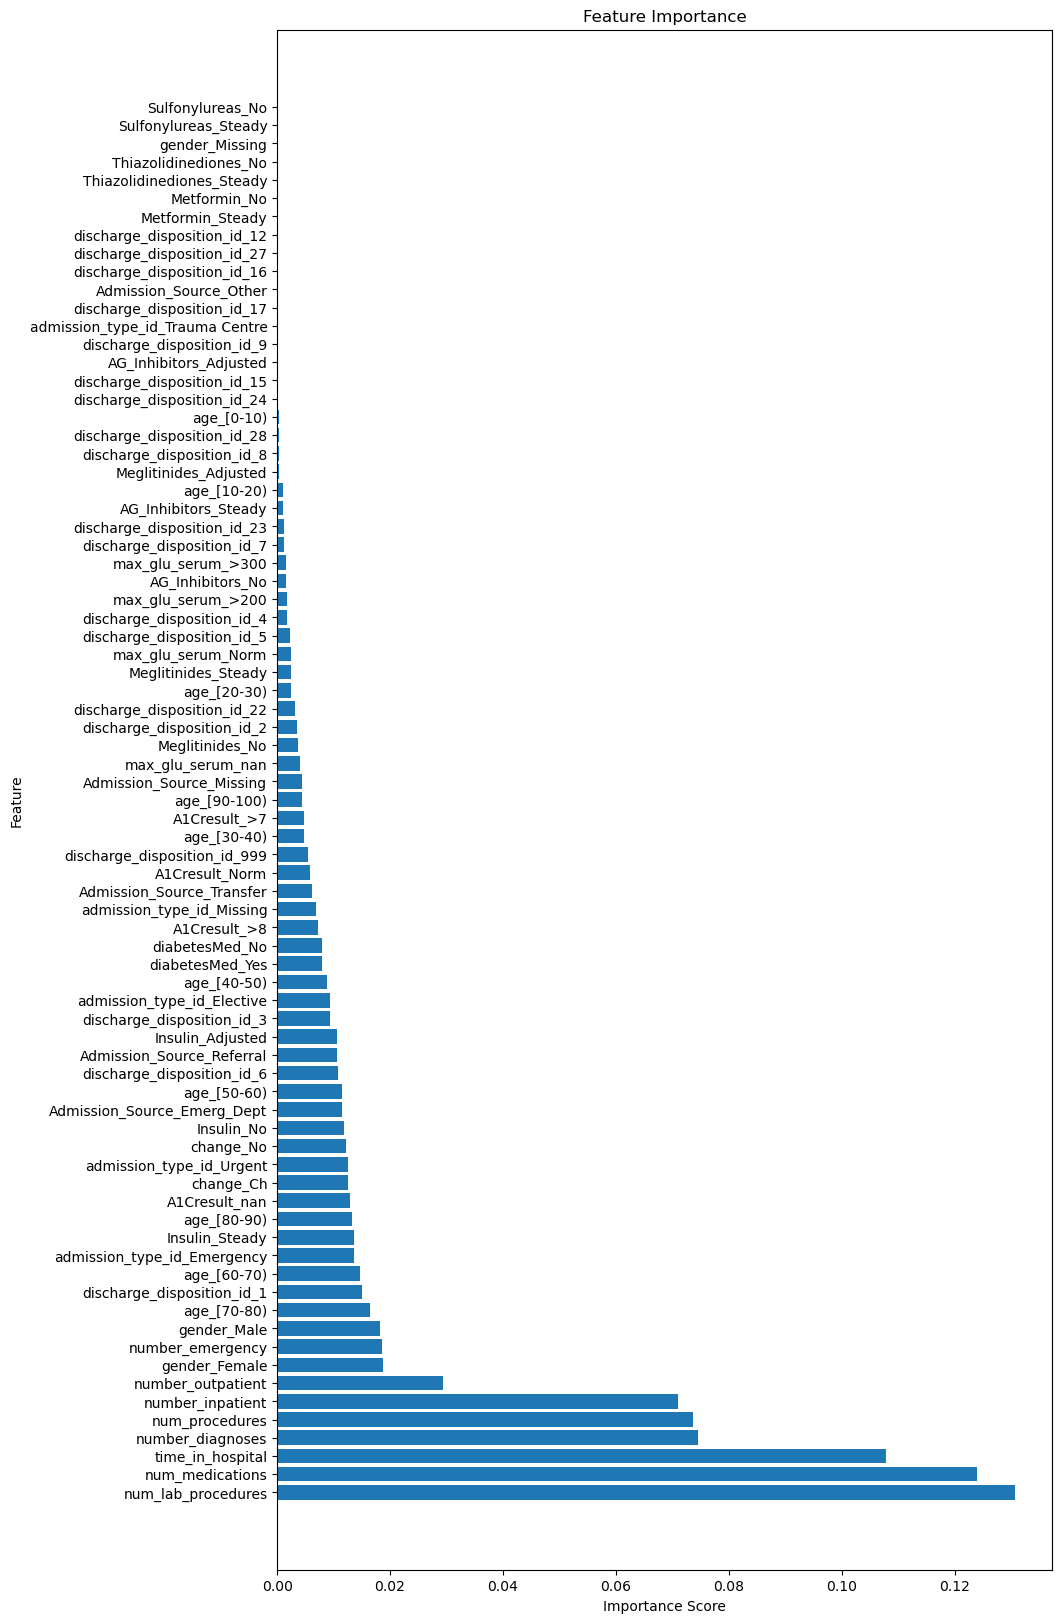

In [18]:
# ***************** THIS CODE DOESN'T CHANGE THE DATASET ************************

# Visualize the feature importance scores

plt.figure(figsize=(10,20))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [19]:
feature_importance_df.iloc[:25, :]

,Feature,Importance
1,num_lab_procedures,0.130671
3,num_medications,0.123827
0,time_in_hospital,0.107811
7,number_diagnoses,0.074585
2,num_procedures,0.073559
6,number_inpatient,0.070915
4,number_outpatient,0.029444
8,gender_Female,0.018742
5,number_emergency,0.018551
9,gender_Male,0.018149


In [20]:
# Select the top 25 attributes in a list
top_25_features = feature_importance_df.iloc[:25, 0].tolist() 

# Select only the top 25 features from X_train
X_train_top_25 = X_train_resampled[top_25_features]

In [21]:
print(len(top_25_features))

print(X_train_top_25.shape)

25
(126204, 25)


In [22]:
X_train_top_25.head(10)

,num_lab_procedures,num_medications,time_in_hospital,number_diagnoses,num_procedures,number_inpatient,number_outpatient,gender_Female,number_emergency,gender_Male,...,age_[80-90),A1Cresult_nan,change_Ch,admission_type_id_Urgent,change_No,Insulin_No,Admission_Source_Emerg_Dept,age_[50-60),discharge_disposition_id_6,Admission_Source_Referral
0,-0.609203,-0.892059,-1.137970,-1.761648,2.743051,-0.538492,-0.362295,0,-0.312787,1,...,0,1,1,0,0,0,0,0,0,1
1,-1.680635,-0.503726,-1.137970,0.825436,1.567417,-0.538492,0.734082,1,1.589016,0,...,0,1,1,0,0,0,1,0,0,0
2,-2.088799,0.014051,-0.801986,0.825436,-0.196033,0.341344,-0.362295,0,-0.312787,1,...,0,0,0,0,1,1,1,0,0,0
3,0.564269,-1.539281,-1.137970,-0.726815,2.155234,-0.538492,-0.362295,0,-0.312787,1,...,0,1,0,0,1,0,0,1,0,1
4,0.003043,-0.374282,-0.801986,-1.761648,0.391784,-0.538492,-0.362295,1,-0.312787,0,...,0,1,0,0,1,0,1,1,0,0
5,0.615289,-1.150948,-0.801986,-1.244232,-0.783849,-0.538492,-0.362295,0,-0.312787,1,...,0,0,0,0,1,0,1,0,0,0
6,0.972433,-0.892059,-1.137970,0.825436,0.979601,-0.538492,-0.362295,1,-0.312787,0,...,0,0,0,0,1,1,0,1,0,0
7,0.615289,-0.374282,-0.130016,0.825436,-0.783849,-0.538492,-0.362295,0,-0.312787,1,...,0,1,1,0,0,0,1,0,0,0
8,-0.711245,1.955716,-1.137970,-0.209398,-0.196033,-0.538492,0.734082,1,-0.312787,0,...,0,1,0,0,1,1,0,0,0,1
9,-1.221450,-1.409836,-0.466001,0.308019,-0.783849,-0.538492,-0.362295,1,-0.312787,0,...,0,1,0,0,1,1,0,0,0,0


In [23]:
# Make changes to X_test dataset
X_test_tree = X_test[top_25_features]

In [24]:
print('X_train\n', X_train_top_25.shape)
print('\nX_test\n', X_test_tree.shape)

X_train
 (126204, 25)

X_test
 (19869, 25)


## KNN Model

In [25]:
# Fitting KNN with the selected features
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train_top_25, Y_train_resampled)

KNeighborsClassifier()

In [26]:
# Start timer
start_time = time.time()

# Making prediction
Y_predict_KNN = KNN.predict(X_test_tree)

# Turn off timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

Time taken: 30.40068793296814 seconds


In [27]:
# Printing actuals and predictions
#print('Actuals:\t\t', list(Y_test))
#print('Predictions with KNN model: \t\t', list(Y_predict_KNN))

## Confusion Matrix & Model Evaluation

In [28]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict_KNN)
print('Confusion matrix: \n', conf_matrix)

Confusion matrix: 
 [[ 287 1084  795]
 [ 936 3591 2717]
 [1312 4634 4513]]


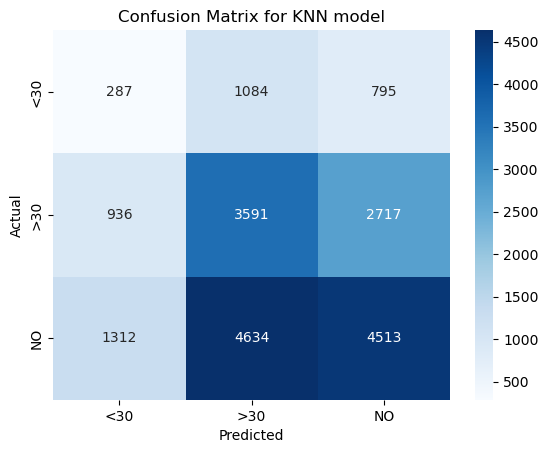

In [29]:
# Define classes

classes = ['<30', '>30', 'NO']

# Convert class labels to numberical labels for computer confusion matrix
Y_test_numeric = [classes.index(label) for label in Y_train]
Y_predict_numeric = [classes.index(label) for label in Y_predict_KNN]

# Generate the confusion matrix
confMatrix = confusion_matrix(Y_test, Y_predict_KNN)

# Create a heatmap for the confusion matrix

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = classes, yticklabels = classes)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN model')
plt.show()

In [30]:
# Calculate Precision, Recal and Accuracy
precision = precision_score(Y_test, Y_predict_KNN, average = 'weighted')
recall = recall_score(Y_test, Y_predict_KNN, average = 'weighted')
accuracy = accuracy_score(Y_test, Y_predict_KNN)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.4490
Recall: 0.4223
Accuracy: 0.4223
